In [1]:
import pandas as pd  # Data handling
import matplotlib.pyplot as plt # visualization
from scipy.integrate import odeint # numerical integration
import numpy as np
from pyvbmc import VBMC # VMBC object
import scipy.stats as scs # scipy stats to get distributions from
from pyvbmc.priors import UniformBox, Trapezoidal, SplineTrapezoidal, SmoothBox # nice priors from PyVBMC
import seaborn as sns

$$x = A\cos(Bt - \delta)$$

In [10]:

def analytic_sol(t,A,B,delta):
    return A * np.cos(B* t - delta) + sigma * np.random.randn(len(t))

def log_likelihood(theta):
    delta = theta
    sol = analytic_sol(t,A,B,delta)
    return np.sum(np.log(1/(sigma* (2*np.pi)**0.5)) - (0.5/sigma**2) * (sol - x_true)**2)

1.5707963267948966


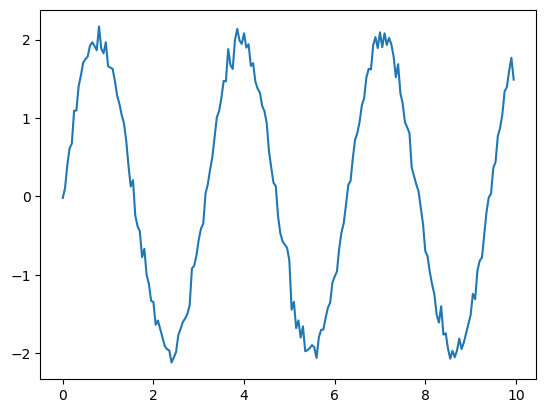

In [26]:
t = np.arange(0,10,0.05)
A = 2
B = 2
delta_true = np.pi / 2
print(delta_true)
x_true = analytic_sol(t,A,B,delta_true)

plt.plot(t,x_true)
plt.show()

best choice for delta_0: 1.59
delta that gives log likelihood minimum: 4.61


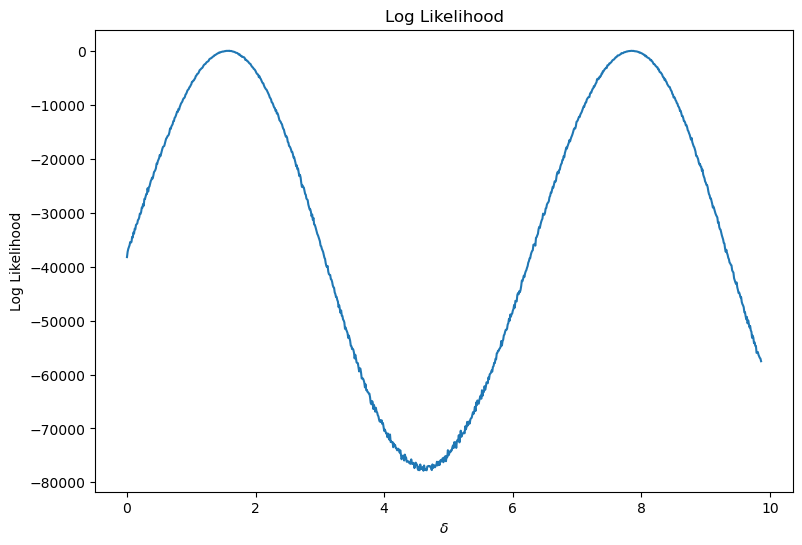

In [36]:
sols = []
deltas = np.arange(0,2*np.pi*delta_true,0.01)
for delta in deltas:
    sols.append(log_likelihood(delta))
print("best choice for delta_0:",deltas[np.argmax(np.array(sols))])
delta_min = deltas[np.argmin(np.array(sols))]
print("delta that gives log likelihood minimum:",delta_min)
plt.figure(figsize=(9,6))
plt.plot(deltas,sols)
plt.title("Log Likelihood")
#plt.ylim(-30000,1000)
plt.xlabel(r"$\delta$")
plt.ylabel("Log Likelihood")
plt.show()

In [39]:
D = 1  

LB = np.full((1, D), 0.0)  # Lower bounds
UB = np.full((1, D), 10.0)  # Upper bounds

PLB = np.copy(LB)
PLB[0][0] = 0.5
PUB = np.copy(UB) 
PUB[0][0] =  9.5


x0 = np.atleast_2d(delta_min)

options = {
    "max_fun_evals": 150
}

prior = SplineTrapezoidal(LB, PLB, PUB, UB)

print("LB:",LB,"PLB:",PLB,"PUB:",PUB,"UB:",UB,'x0:',x0)

LB: [[0.]] PLB: [[0.5]] PUB: [[9.5]] UB: [[10.]] x0: [[4.61]]


In [40]:
vbmc = VBMC(log_likelihood, x0, LB, UB, PLB, PUB, prior = prior,options = options) # initialize VMBC object

vp, results = vbmc.optimize() # do optimization (might take a while)

Beginning variational optimization assuming EXACT observations of the log-joint.
 Iteration  f-count    Mean[ELBO]    Std[ELBO]    sKL-iter[q]   K[q]  Convergence  Action


     0         10        -399.16       288.26          inf        2        inf     start warm-up
     1         15          63.50         0.01        49.13        2        inf     
     2         20       -8972.09       497.67    121478.10        2   4.08e+06     
     3         25        -419.52        31.09     83986.74        2   2.83e+06     
     4         30      -13638.88     13538.56        61.44        2   9.12e+04     
     5         35       -8552.27     11834.42         0.19        2   5.64e+04     
     6         40          75.91        21.42      9097.37        2   3.06e+05     
     7         45          77.15        16.98         0.02        2       6.81     
     8         50          73.53        14.89         0.00        2       6.18     
     9         55          72.76        12.79         0.03        2       5.65     
    10         60          73.71        10.92         0.02        2       4.63     
    11         65          73.46        10.50         0.06     

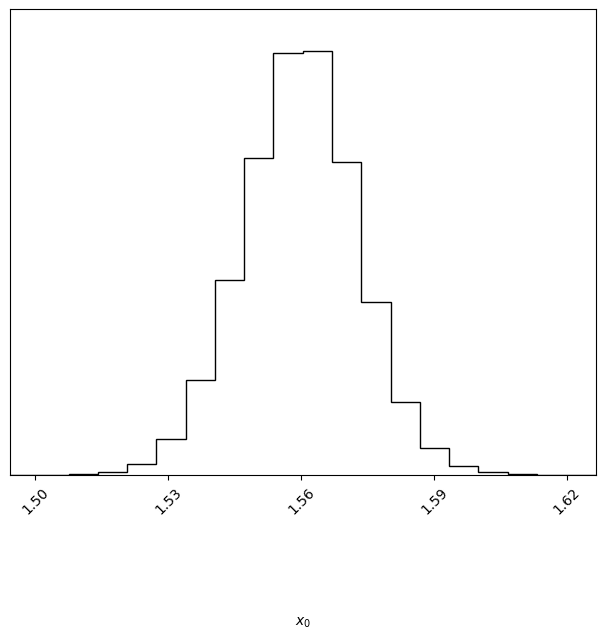

In [41]:
vp.plot();

In [50]:
def log_likelihood(theta):
    delta,A = theta
    sol = analytic_sol(t,A,B,delta)
    return np.sum(np.log(1/(sigma* (2*np.pi)**0.5)) - (0.5/sigma**2) * (sol - x_true)**2)

D = 2
LB = np.full((1, D), 0.0)  # Lower bounds
UB = np.full((1, D), 10.0)  # Upper bounds
# LB[0][0] = 0.0
# LB[0][1] = 1.0
# UB[0][0] = 0.99

PUB = np.copy(UB) 
PUB[0][0] = 9.5
PUB[0][1] = 9.5
PLB = np.copy(LB)
PLB[0][0] = 0.5
PLB[0][1] = 0.5

x0 = 3 * np.ones((1, D))
x0[0][0] = delta_min
prior = SplineTrapezoidal(LB, PLB, PUB, UB)

options = {
    "max_fun_evals": 500
}

print("LB:",LB,"PLB:",PLB,"PUB:",PUB,"UB:",UB,'x0:',x0)

LB: [[0. 0.]] PLB: [[0.5 0.5]] PUB: [[9.5 9.5]] UB: [[10. 10.]] x0: [[4.61 3.  ]]


In [51]:
vbmc2 = VBMC(log_likelihood, x0, LB, UB, PLB, PUB, prior = prior,options = options) # initialize VMBC object

vp2, results2 = vbmc2.optimize() # do optimization (might take a while)

Beginning variational optimization assuming EXACT observations of the log-joint.
 Iteration  f-count    Mean[ELBO]    Std[ELBO]    sKL-iter[q]   K[q]  Convergence  Action


     0         10      -11395.12     21014.34          inf        2        inf     start warm-up
     1         15       -3172.63     13229.94      5087.05        2        inf     
     2         20       -9413.89      8242.75       388.53        2   5.74e+04     
     3         25       -4367.27      4636.72      1233.07        2   6.13e+04     
     4         30      -17639.87     11537.62    136093.82        2   3.29e+06     
     5         35      -11819.08      1711.72    145274.86        2   3.45e+06     
     6         40      -11214.50      4246.76      2429.17        2   7.34e+04     
     7         45       -8813.20      3335.43       617.30        2   3.37e+04     
     8         50       -8894.03      8817.71      1090.86        2   5.54e+04     
     9         55       -9374.63      8365.61      5125.33        2    1.5e+05     
    10         60       -5518.17     11312.39     26093.61        2   6.66e+05     
    11         65      -12166.39      2234.87    164890.19     

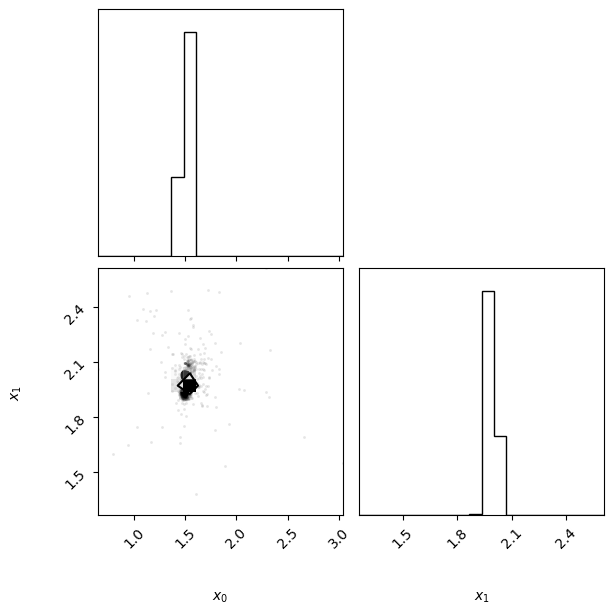

In [58]:
vp2.plot();

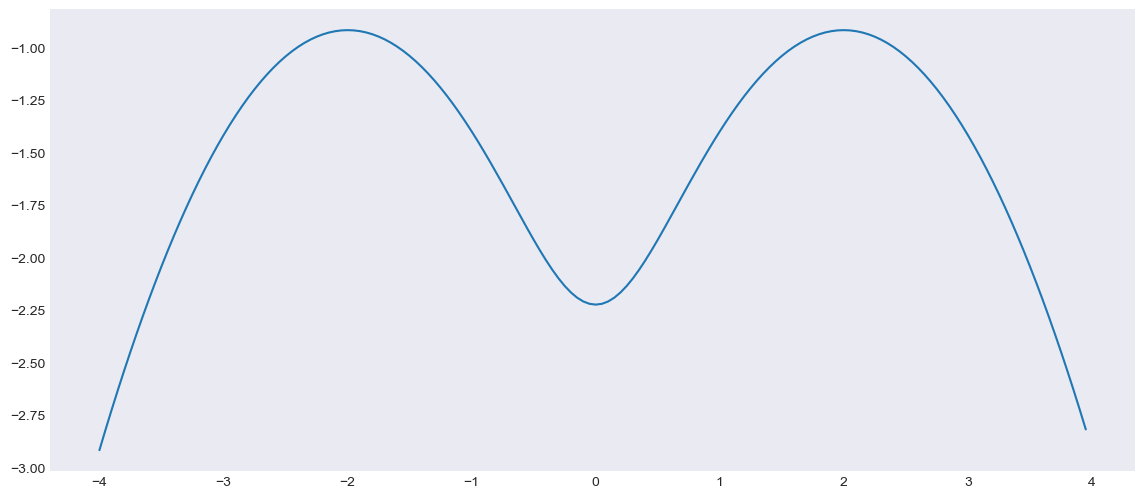

In [141]:
import scipy.stats as scs
norm1 = scs.norm(loc = -2.0, scale = 1.0)
norm2 = scs.norm(loc = 2.0, scale = 1.0)
x = np.arange(-4,4,0.05)
dual_pdf = norm1.pdf(x) + norm2.pdf(x)

plt.plot(x,np.log(dual_pdf))

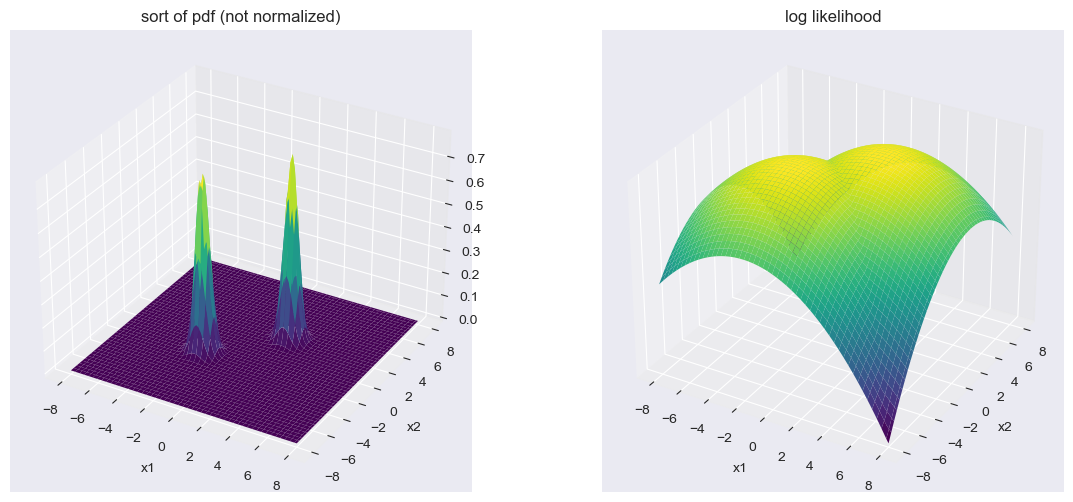

In [150]:
sigma = 0.2
norm1 = scs.multivariate_normal(mean = np.array([2,2]), cov = np.array([[sigma,0],[0,sigma]]))
norm2 = scs.multivariate_normal(mean = np.array([-2,-2]), cov = np.array([[sigma,0],[0,sigma]]))

double_pdf = lambda x: norm1.pdf(x) + norm2.pdf(x)
log_likelihood = lambda x: np.log(double_pdf(x))

x = np.linspace(-8, 8, num=100)
y = np.linspace(-8, 8, num=100)
X, Y = np.meshgrid(x,y)

pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = double_pdf([X[i,j], Y[i,j]])

logpdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        logpdf[i,j] = log_likelihood([X[i,j], Y[i,j]])

fig = plt.figure()	
ax1 = fig.add_subplot(121, projection = '3d')
ax1.plot_surface(X, Y, pdf, cmap = 'viridis')
ax1.set_title("sort of pdf (not normalized)")
plt.xlabel("x1")
plt.ylabel("x2")
ax.axes.zaxis.set_ticks([])


ax2 = fig.add_subplot(122, projection = '3d')
ax2.plot_surface(X, Y, logpdf, cmap = 'viridis')
ax2.set_title("log likelihood")
plt.xlabel("x1")
plt.ylabel("x2")
ax2.axes.zaxis.set_ticks([])
plt.show()

In [133]:
D = 2
LB = np.full((1, D), -10.0)  # Lower bounds
UB = np.full((1, D), 10.0)  # Upper bounds


PLB = np.full((1, D), -4.0)  # Plausible Lower bounds
PUB = np.full((1, D), 4.0)  # Plausible Upper bounds

x0 = 2 * np.ones((1, D))

prior = SplineTrapezoidal(LB, PLB, PUB, UB)

options = {
    "max_fun_evals": 500
}

print("LB:",LB,"PLB:",PLB,"PUB:",PUB,"UB:",UB,'x0:',x0)

LB: [[-10. -10.]] PLB: [[-4. -4.]] PUB: [[4. 4.]] UB: [[10. 10.]] x0: [[2. 2.]]


In [134]:
vbmc3 = VBMC(log_likelihood, x0, LB, UB, PLB, PUB, prior = prior,options = options) # initialize VMBC object

vp3, results3 = vbmc3.optimize() # do optimization (might take a while)

Beginning variational optimization assuming EXACT observations of the log-joint.
 Iteration  f-count    Mean[ELBO]    Std[ELBO]    sKL-iter[q]   K[q]  Convergence  Action


     0         10         -19.69         7.79  57291020.77        2        inf     start warm-up
     1         15          -7.25         3.71         2.54        2        inf     
     2         20          -5.63         0.99         0.31        2       16.1     
     3         25          -4.56         0.02         0.14        2       6.98     
     4         30          -4.55         0.01         0.00        2      0.105     
     5         35          -4.55         0.00         0.00        2     0.0251     
     6         40          -4.59         0.00         0.00        2      0.192     end warm-up
     7         45          -4.55         0.00         0.00        2      0.167     
     8         50          -4.59         0.00         0.00        2      0.153     
     9         55          -4.59         0.00         0.00        5     0.0162     
    10         60          -4.58         0.00         0.00        8     0.0273     rotoscale, undo rotoscale
    11         65          

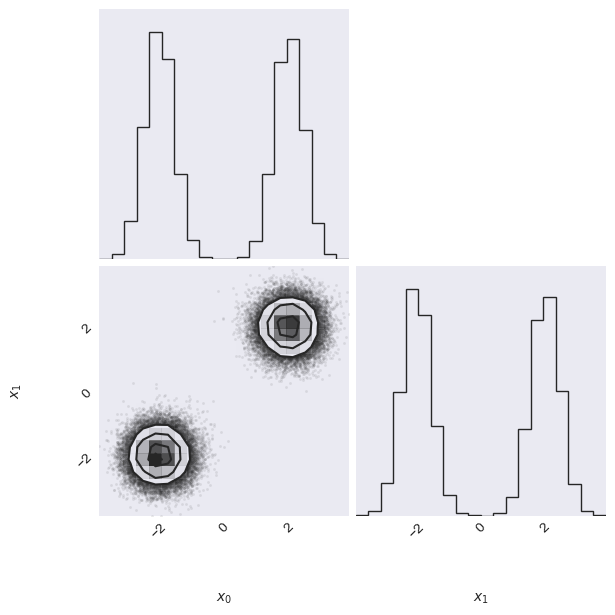

In [136]:
vp3.plot();

In [138]:
vp3.save("doubly_peaked_vp.pkl")

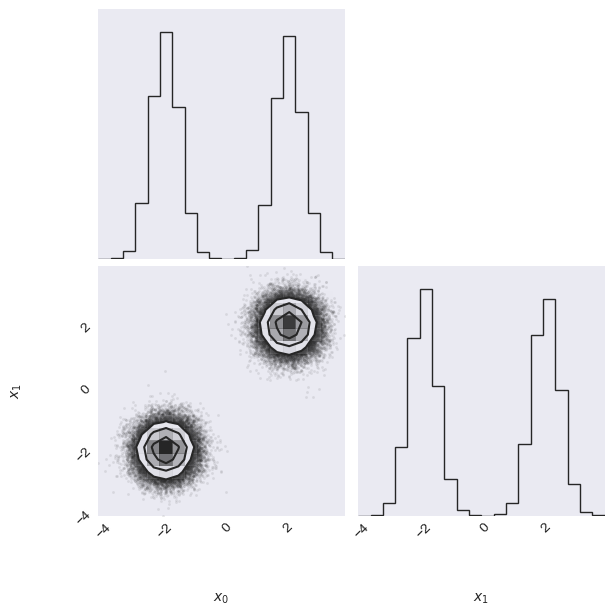

In [140]:
from pyvbmc import VariationalPosterior

doubly_peaked_vp = VariationalPosterior.load("doubly_peaked_vp.pkl")

doubly_peaked_vp.plot();